# Assignment #4 & #5 - Data Gathering and Warehousing - DSSA-5102

Instructor: Melissa Laurino</br>
Spring 2025</br>

Name: Melissa Laurino / Instructor Guide
</br>
Date: 2/6/2025
<br>
<br>
<b>Only Murders in the...Database?</b><br>
An introduction to navigating databases using SQL, Python and Jupyter Notebook. <br>
<br>
A crime has taken place and you are the perfect amateur detective to solve it! 
<br>
The detective gave you the crime scene report, but you somehow lost it...? You vaguely remember that the crime
was a murder that occurred sometime on <b>Jan.15, 2018</b> and that it took place in <b>SQL
City</b>. All the clues to this mystery are buried in a huge database, and you need to use
SQL to navigate through this network of information. Your first step to solving the mystery is to retrieve the corresponding crime scene report from the police department’s database. Take a look at the cheatsheet to learn how to do this! From there, you can use your SQL skills to find the murderer.<br>

Your task for <b>Assignment #4</b> is to:<br>
- Connect to the database stored locally using Python.
- Explore the database by listing all tables, fields within the tables, and data types.
- Find out who the murderer is!<br>
- Add detailed comments to explain EVERY query or SQL command you use while we are still learning and practicing. I have my steps outlined, but please add more cells inbetween for additional queries! There is no limit on the number of queries you can use. <br>
- For each query include comments such as "SELECT all records FROM table WHERE column name = X"<br>
- Answer any prompts in markdown cells.<br>
<br>

Your task for <b>Assignment #5</b> is to complete the following objectives:<br> You are a data scientist that was hired by SQL City.<br>
- Objective 1: The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a ggplot2 bar graph visual to support your recommendation.<br>
- Objective 2: The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime? <br>
- Objective 3: To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?<br>

Basic usage of database commands in Python with SQLite3 library: https://docs.python.org/3/library/sqlite3.html

This fabulous database was created by @NUKnightLab on Github and can be found here: https://github.com/NUKnightLab/sql-mysteries

In [13]:
# Load necessary packages:
from sqlalchemy import create_engine, inspect, text # Database navigation
import sqlite3 # A second option for working with databases
import pandas as pd # Python data manilpulation
import matplotlib.pyplot as plt # Basic graphing
import seaborn as sns # Other graphs

Database files are indicated by the .db file extension. For this exercise, our database has already been created. To avoid setting your working directory, have the .db file and Assignment#4_LastName.ipynb in the same file location. There are multiple libraries depending on your platform that can be used to navigate database files and connect to SQL for databases that are stored on a server or your computer as a local host.

### SQLite3

In [18]:
# How to connect to our .db file using library SQLite3
# Notice that we are not specifiying a host, password, or server since this .db file is stored locally.
db_path = "sql-murder-mystery.db"  # Change this to your actual .db file name
conn = sqlite3.connect(db_path) # Connect to the SQLite database (Our working directory does not need to be set since we are working out of the same folder)
cursor = conn.cursor()

In [20]:
# Explore the database
# List all of the tables present in the database. Do they match the schema image?
# This is a good way to double check that your database was loaded correctly.
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
tables = [t[0] for t in tables]  # Extract table names from tuples
print("Tables in Database:", tables)

Tables in Database: ['crime_scene_report', 'drivers_license', 'person', 'facebook_event_checkin', 'interview', 'get_fit_now_member', 'get_fit_now_check_in', 'income', 'solution']


In [120]:
# Disconnect to our .db file 
conn.close()

### SQLAlchemy

In [31]:
# How to connect to our .db file using library SQLAlchemy
# Notice that we are not specifiying a host, password, or server since this .db file is stored locally.
db_path = "sql-murder-mystery.db"  # Change this to your actual file name
engine = create_engine(f"sqlite:///{db_path}") # Use the create_engine function to connect to the database
engine # The f is the connection string, so if we print it we can see below

Engine(sqlite:///sql-murder-mystery.db)

SQLAlchemy needs to know what kind of database we are accessing. .db files can be treated as a SQLite database. Other options include databases formatted for MySQL, PostgreSQL, etc. Database type prefixes must be included.

In [33]:
# Explore the database
# List the tables in our database:
inspector = inspect(engine)  # Create an inspector to examine the database
tables = inspector.get_table_names()  # Get all table names from the database
print("Tables in the Database:", tables)

Tables in the Database: ['crime_scene_report', 'drivers_license', 'facebook_event_checkin', 'get_fit_now_check_in', 'get_fit_now_member', 'income', 'interview', 'person', 'solution']


In [35]:
# Explore the database
# List the fields for our tables:
columns = inspector.get_columns("person")  # Get column details for the "person" table
print("Fields in person Table:")
for col in columns:
    print(f" - {col['name']} ({col['type']})")  # Print column names and data types

Fields in person Table:
 - id (INTEGER)
 - name (TEXT)
 - license_id (INTEGER)
 - address_number (INTEGER)
 - address_street_name (TEXT)
 - ssn (INTEGER)


In [261]:
# Explore the database
# List the fields for all the tables in the database:
for table in tables:  # Loop through each table found in the database
    print(f"\n Fields in {table}:")  # Print table name
    columns = inspector.get_columns(table)  # Get all column names and their types for this table
    for col in columns:  # Loop through each column
        print(f" - {col['name']} ({col['type']})")  # Print column name and data type
# What table will help us get to the next clue?


 Fields in crime_scene_report:
 - date (INTEGER)
 - type (TEXT)
 - description (TEXT)
 - city (TEXT)

 Fields in drivers_license:
 - id (INTEGER)
 - age (INTEGER)
 - height (INTEGER)
 - eye_color (TEXT)
 - hair_color (TEXT)
 - gender (TEXT)
 - plate_number (TEXT)
 - car_make (TEXT)
 - car_model (TEXT)

 Fields in facebook_event_checkin:
 - person_id (INTEGER)
 - event_id (INTEGER)
 - event_name (TEXT)
 - date (INTEGER)

 Fields in get_fit_now_check_in:
 - membership_id (TEXT)
 - check_in_date (INTEGER)
 - check_in_time (INTEGER)
 - check_out_time (INTEGER)

 Fields in get_fit_now_member:
 - id (TEXT)
 - person_id (INTEGER)
 - name (TEXT)
 - membership_start_date (INTEGER)
 - membership_status (TEXT)

 Fields in income:
 - ssn (INTEGER)
 - annual_income (INTEGER)

 Fields in interview:
 - person_id (INTEGER)
 - transcript (TEXT)

 Fields in person:
 - id (INTEGER)
 - name (TEXT)
 - license_id (INTEGER)
 - address_number (INTEGER)
 - address_street_name (TEXT)
 - ssn (INTEGER)

 Fields 

Practice using commmands useful in queries:

In [270]:
# Example: 
# Select all records from the table crime_scene_report where type is murder:
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT * 
                    FROM crime_scene_report 
                    WHERE type='murder'
                    """)                      # Define the query - text() ensures that the query string is read as a SQL expression 
    practice = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database
    
# Print the results
practice

,date,type,description,city
0,20180115,murder,Life? Dont talk to me about life.,Albany
1,20180115,murder,"Mama, I killed a man, put a gun against his he...",Reno
2,20180215,murder,REDACTED REDACTED REDACTED,SQL City
3,20180215,murder,Someone killed the guard! He took an arrow to ...,SQL City
4,20170107,murder,‘It proves nothing of the sort!’ said Alice. ‘...,Memphis
5,20170108,murder,get” is the same thing as “I get what I like”!’\n,Round Lake Beach
6,20170108,murder,"HEARTHRUG,\n",Jacksonville
7,20170111,murder,\n,Springdale
8,20170121,murder,"her, to pass away the time.\n",Murfreesboro
9,20170122,murder,"came near her, she began, in a low, timid voic...",Temecula


In [154]:
#Select all records from the table drivers_license where the eye color is amber:

with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT * 
                  FROM drivers_license 
                  WHERE eye_color='amber'
                  """)  # Define the query - text() ensures that the query string is read as a SQL expression 
    practice2 = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database
    
# Print the results
practice2

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,101198,43,54,amber,brown,female,Y5NZ08,Nissan,Rogue
1,101586,57,70,amber,brown,male,31U1KE,Jaguar,XK
2,101640,87,67,amber,black,male,3U18J6,Volvo,S60
3,101773,55,57,amber,black,female,VK5SOO,Chevrolet,Express 1500
4,101782,57,61,amber,green,female,0LX0QI,Toyota,Matrix
...,...,...,...,...,...,...,...,...,...
1942,998262,36,54,amber,black,female,5T8618,Lexus,SC
1943,998350,20,78,amber,grey,male,6HRAXP,Mitsubishi,Lancer
1944,998741,60,62,amber,blue,female,886XH6,Honda,Insight
1945,999509,42,80,amber,blue,female,8E403S,Morgan,Aero 8


In [158]:
#Select distinct records of eye_color from the table drivers_license:

with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT DISTINCT eye_color 
                    FROM drivers_license""")  # Define the query - text() ensures that the query string is read as a SQL expression 
    practice3 = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database
    
# Print the results
practice3

,eye_color
0,brown
1,green
2,amber
3,blue
4,black


In [160]:
#Select distinct records of name from the table person:

with engine.connect() as connection:  # Establish a connection
    query = text("SELECT DISTINCT name FROM person")  # Define the query - text() ensures that the query string is read as a SQL expression 
    practice4 = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database
    
# Print the results
practice4

,name
0,Christoper Peteuil
1,Kourtney Calderwood
2,Muoi Cary
3,Era Moselle
4,Trena Hornby
...,...
10006,Luba Benser
10007,Roxana Mckimley
10008,Cherie Zeimantz
10009,Allen Cruse


In [162]:
#Select distinct records of gender AND car_model from the table drivers_license:

with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT DISTINCT gender, car_model 
                    FROM drivers_license""")  # Define the query - text() ensures that the query string is read as a SQL expression 
    practice5 = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database
    
# Print the results
practice5

,gender,car_model
0,male,MDX
1,female,SRX
2,female,xB
3,female,Rogue
4,female,GS
...,...,...
1365,female,550
1366,female,Prius c
1367,female,BRZ
1368,male,Mark LT


In [166]:
#Select distinct records of type and city from the table crime_scene_report:

with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT DISTINCT type, city 
                    FROM crime_scene_report""")  # Define the query - text() ensures that the query string is read as a SQL expression 
    practice6 = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database
    
# Print the results
practice6

,type,city
0,robbery,NYC
1,murder,Albany
2,murder,Reno
3,murder,SQL City
4,theft,Chicago
...,...,...
1038,robbery,Trenton
1039,bribery,Garden Grove
1040,fraud,Houma
1041,assault,Fontana


In [168]:
#Select all records from table drivers_license where the age is == 48:

with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT * 
                    FROM drivers_license 
                    WHERE age == 48""")  # Define the query - text() ensures that the query string is read as a SQL expression 
    practice7 = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database
    
# Print the results
practice7

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,101494,48,55,blue,red,female,81X1N7,Kia,Sportage
1,105188,48,80,blue,black,male,R4Z3OC,Land Rover,Range Rover Sport
2,107867,48,50,amber,blue,male,FK47DF,Chevrolet,Monte Carlo
3,117726,48,70,brown,red,male,7JUJCY,Honda,Civic
4,124854,48,60,blue,grey,female,RH14TP,Bentley,Continental Flying Spur
...,...,...,...,...,...,...,...,...,...
123,968887,48,64,brown,red,male,SB7H43,Honda,Ridgeline
124,969472,48,51,amber,grey,female,4K4JNI,Lexus,ES
125,970725,48,54,amber,blue,female,A3P5ZJ,Audi,A6
126,981392,48,63,green,grey,male,Z0137N,Mazda,MX-5


In [172]:
#Select all records from table drivers_license where the age is less than 48:

with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT * 
                  FROM drivers_license 
                    WHERE age < 48""")  # Define the query - text() ensures that the query string is read as a SQL expression 
    practice8 = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database
    
# Print the results
practice8

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,101198,43,54,amber,brown,female,Y5NZ08,Nissan,Rogue
1,101255,18,79,blue,grey,female,5162Z1,Lexus,GS
2,101611,40,65,blue,white,female,5O8VW7,GMC,Sierra Denali
3,101859,31,71,blue,blonde,female,02B7L4,Nissan,Pathfinder
4,101862,26,75,green,blonde,male,LQ23Y5,Nissan,350Z
...,...,...,...,...,...,...,...,...,...
4275,998262,36,54,amber,black,female,5T8618,Lexus,SC
4276,998350,20,78,amber,grey,male,6HRAXP,Mitsubishi,Lancer
4277,999509,42,80,amber,blue,female,8E403S,Morgan,Aero 8
4278,999923,19,77,amber,black,female,5L0ZI4,GMC,Sierra 3500


In [174]:
#Select all records from table drivers_license where the age is less than OR equal to 48:
#Do you see a difference in the number of rows?

with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT * 
                FROM drivers_license 
                WHERE age <= 48""")  # Define the query - text() ensures that the query string is read as a SQL expression 
    practice8 = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database
    
# Print the results
practice8

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,101198,43,54,amber,brown,female,Y5NZ08,Nissan,Rogue
1,101255,18,79,blue,grey,female,5162Z1,Lexus,GS
2,101494,48,55,blue,red,female,81X1N7,Kia,Sportage
3,101611,40,65,blue,white,female,5O8VW7,GMC,Sierra Denali
4,101859,31,71,blue,blonde,female,02B7L4,Nissan,Pathfinder
...,...,...,...,...,...,...,...,...,...
4403,998350,20,78,amber,grey,male,6HRAXP,Mitsubishi,Lancer
4404,998476,48,72,black,blue,female,YC22H2,Cadillac,CTS
4405,999509,42,80,amber,blue,female,8E403S,Morgan,Aero 8
4406,999923,19,77,amber,black,female,5L0ZI4,GMC,Sierra 3500


In [176]:
#Select all records from table get_fit_now_check_in and order by check_in_date:
#Do you see a difference in the number of rows?

with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT * 
                    FROM get_fit_now_check_in 
                    ORDER BY check_in_date""")  # Define the query - text() ensures that the query string is read as a SQL expression 
    practice9 = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database
    
# Print the results
practice9

,membership_id,check_in_date,check_in_time,check_out_time
0,82GA2,20170101,431,1116
1,KE0FH,20170101,375,447
2,C84S4,20170101,580,864
3,XTE42,20170101,1188,1199
4,TQU5U,20170101,381,1069
...,...,...,...,...
2698,C581L,20180430,76,642
2699,0U51D,20180501,88,218
2700,7788A,20180501,532,705
2701,VHN8M,20180501,658,989


In [178]:
#Select all records from table get_fit_now_check_in and order by check_in_date and 
#order by check_in_time:
#Do you see a difference in the order of the rows?

with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT * FROM get_fit_now_check_in 
                    ORDER BY check_in_date, check_in_time""")  # Define the query - text() ensures that the query string is read as a SQL expression 
    practice10 = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database
    
# Print the results
practice10

,membership_id,check_in_date,check_in_time,check_out_time
0,C581L,20170101,23,1071
1,3JP0X,20170101,154,609
2,J2033,20170101,242,955
3,KE0FH,20170101,375,447
4,TQU5U,20170101,381,1069
...,...,...,...,...
2698,133ED,20180430,1197,1200
2699,0U51D,20180501,88,218
2700,7788A,20180501,532,705
2701,VHN8M,20180501,658,989


Now that we have practiced, let's solve this murder!

All we know at the start of our investigation is the <b>murder</b> occurred on <b>Jan.15, 2018</b> and that it took place in <b>SQL City<b>.

In [216]:
#Write a query in SQL to view the crime scene report 
#for the murder occurred on Jan.15, 2018 and that it took place in SQL City.
#Select ALL records FROM the crime_scene_report table WHERE the date is 1/15/18 and the city
#is SQL city and the type of crime is murder.

#pd.set_option('display.max_columns', None)  # None means no limit on the number of columns
#pd.set_option('display.width', None) # Set to None to make the display as wide as needed
#pd.set_option('display.max_rows', None)  # Optional: to show all rows without truncation
#pd.options.display.width = None               # Allow for wide tables
#pd.options.display.max_rows = None            # Show all rows without truncation

with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT *
                        FROM crime_scene_report
                        WHERE
                            date = '20180115'
                        AND city = 'SQL City'
                        AND type = 'murder'
                        """)
    csr = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

# Print the results
csr

,date,type,description,city
0,20180115,murder,Security footage shows that there were 2 witne...,SQL City


In [218]:
print(csr.to_string())

       date    type                                                                                                                                                                                description      city
0  20180115  murder  Security footage shows that there were 2 witnesses. The first witness lives at the last house on "Northwestern Dr". The second witness, named Annabel, lives somewhere on "Franklin Ave".  SQL City


Another clue! It looks like we have two witnesses! Now who are they and how do we find them?

In [220]:
#Write two queries in SQL to find each witness in the person table. 
#For the first query as first_witness, select all the records from person where the address_street_name 
#is Northwestern Drive and order by descending adress_number and only limit the result set to 1
#Fetch the first_witness

with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT *
                        FROM person
                        WHERE
                            address_street_name = 'Northwestern Dr'
                        ORDER BY address_number DESC
                        LIMIT 1
                        """)
    first_witness = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

# Print the results
first_witness

,id,name,license_id,address_number,address_street_name,ssn
0,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949


We have identified our first witness as Monty Shapiro. Now lets find the second!

In [222]:
#For the third query as second_witness,
#Select all the records from the person table where the address_street_name is Frnaklin Ave and the name 
#includes something LIKE Annabel. 
#Fetch the second_witness

with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT *
                        FROM person
                        WHERE
                            address_street_name = 'Franklin Ave'
                        AND name LIKE '%Annabel%'
                        """)
    second_witness = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

# Print the results
second_witness

,id,name,license_id,address_number,address_street_name,ssn
0,16371,Annabel Miller,490173,103,Franklin Ave,318771143


We have identified our second witness as Annabel Miller. What were their witness statements? What did they see?

In [224]:
#For our fourth query, witness_statements, lets find out what each witness saw...or claim they saw?
#Select ALL from interview table where the person ID is 14887 and 16371
#The IN command allows you to select (multiple, values) in a WHERE clause.

with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT *
                    FROM interview
                    WHERE person_id IN (14887, 16371)
                        """)
    witness_statements = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

# Print the results
witness_statements

#OR

#Select the peron's name and all interviews where the person_id is 14887 and 16371
#The IN command allows you to specify (multiple, values) in a WHERE clause.
#AND The only rows where the person ID matches between the interview and person tables 
#are included in the result set.
#(ID was obtained from the above queries)

#with engine.connect() as connection:  # Establish a connection
#    query = text("""SELECT p.name, i.*
#                                    FROM interview as i, person as p
#                                    WHERE
#                                    person_id IN (14887, 16371)
#                                    AND i.person_id = p.id
#                        """)
#    witness_statements = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

#OR

#with engine.connect() as connection:  # Establish a connection
#    query = text("""SELECT person.name, interview.*
#                                       FROM interview
#                                       JOIN person ON interview.person_id = person.id
#                                       WHERE person_id IN (14887, 16371)
#                        """)
#    witness_statements = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

# Print the results
#witness_statements

,person_id,transcript
0,14887,I heard a gunshot and then saw a man run out. ...
1,16371,"I saw the murder happen, and I recognized the ..."


In [226]:
print(witness_statements.to_string())

   person_id                                                                                                                                                                                                                       transcript
0      14887  I heard a gunshot and then saw a man run out. He had a "Get Fit Now Gym" bag. The membership number on the bag started with "48Z". Only gold members have those bags. The man got into a car with a plate that included "H42W".
1      16371                                                                                                            I saw the murder happen, and I recognized the killer from my gym when I was working out last week on January the 9th.


A few new clues! Explore the different clues with multiple queries. Seems like a reliable statement!

In [234]:
#Create a query to select for the following clues: 
#(You can create multiple queries or combine them into one and go from there)
#Explore the Get Fit Now Gym database
#Check in date is 20180109
#Membership number contained something like 48Z
#Plate number contains something like H42W

with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT person.name, 
                                    drivers_license.plate_number, 
                                    get_fit_now_member.id, 
                                    get_fit_now_check_in.check_in_date
                            FROM person, drivers_license, 
                                    get_fit_now_member, 
                                    get_fit_now_check_in
                            WHERE get_fit_now_member.person_id = person.id
                            AND get_fit_now_member.id = get_fit_now_check_in.membership_id
                            AND person.license_id = drivers_license.id
                            AND get_fit_now_check_in.membership_id LIKE '%48Z%'
                            AND drivers_license.plate_number LIKE '%H42W%'
                            AND get_fit_now_check_in.check_in_date = '20180109'
                        """)
    suspects = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

# Print the results
suspects

#Same query written slightly different with table abbreviations, and a Join/ON command:

with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT p.name, dl.plate_number, gfm.id, gfc.check_in_date
    FROM person as p, drivers_license as dl, get_fit_now_member as gfm, get_fit_now_check_in as gfc
    ON gfm.person_id = p.id
        AND gfm.id = gfc.membership_id
        AND p.license_id = dl.id
    WHERE gfc.membership_id LIKE '%48Z%'
        AND dl.plate_number LIKE '%H42W%'
        AND gfc.check_in_date = '20180109'
                        """)
    suspects2 = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

# Print the results
suspects2

#Notice that both of these queries yield the same result set.

,name,plate_number,id,check_in_date
0,Jeremy Bowers,0H42W2,48Z55,20180109


We have a suspect! Lets check their witness statement. Do they have an alibi?

In [238]:
#Now that we are more familiar with the database, we can use abbreviated table names to make our queries more concise.
#This is not mandatory, but for future queries and very large databases, it may be helpful. Especially if we are referencing tables many times.
#SELECT the name from the person table, and all interviews by joining (ON) the two tables by the id and person_id column
#WHERE the person's name is 'Jeremy Bowers'

with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT p.name, i.*
    FROM person as p, interview as i
    ON p.id = i.person_id
    WHERE p.name = 'Jeremy Bowers'
                        """)
    jeremy = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

# Print the results
jeremy

#OR (Without using ON/Join command)

with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT p.name, i.*
    FROM person as p, interview as i
    WHERE p.id = i.person_id
    AND p.name = 'Jeremy Bowers'
                        """)
    jeremy1 = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

# Print the results
jeremy1

#OR (Without using abbreviations for table names)

with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT person.name, interview.*
                           FROM person, interview
                           WHERE person.id = interview.person_id
                           AND person.name = 'Jeremy Bowers'
                        """)
    jeremy2 = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

# Print the results
jeremy2

#Three different ways to obtain the same query result set.

,name,person_id,transcript
0,Jeremy Bowers,67318,I was hired by a woman with a lot of money. I ...


In [240]:
print(jeremy.to_string())

            name  person_id                                                                                                                                                                                                                                          transcript
0  Jeremy Bowers      67318  I was hired by a woman with a lot of money. I don't know her name but I know she's around 5'5" (65") or 5'7" (67"). She has red hair and she drives a Tesla Model S. I know that she attended the SQL Symphony Concert 3 times in December 2017.\n


Uh oh...turns out it wasn't just one person behind the crime...who is this additional person involved?

In [242]:
#Lets find all women who have red hair, with a Tesla Model S, and are between 65" and 67" in height:
#You can complete this in a single query or multiple queries.

#SELECT all FROM drivers_license table WHERE the gender is female AND hair_color is red AND car_make is Tesla
#AND car_model = Model S AND height is BETWEEN the values 65 and 67:

with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT *
                            FROM drivers_license
                            WHERE gender = 'female' 
                            AND hair_color = 'red' 
                            AND car_make = 'Tesla' 
                            AND car_model = 'Model S' 
                            AND height BETWEEN 65 AND 67
                        """)
    redhairgirl = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

# Print the results
redhairgirl

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,202298,68,66,green,red,female,500123,Tesla,Model S
1,291182,65,66,blue,red,female,08CM64,Tesla,Model S
2,918773,48,65,black,red,female,917UU3,Tesla,Model S


Three different people match this description! Now which one attended the SQL Symphony Concert three times? 

In [244]:
#Write a query, murderer, to discover who attended the symphony concert three times. Let's find the killer!

with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT person.name, 
                              facebook_event_checkin.*
                              FROM facebook_event_checkin, person, drivers_license
                              WHERE facebook_event_checkin.person_id = person.id
                              AND person.license_id = drivers_license.id
                              AND person.license_id IN (202298,291182,918773)
                        """)
    murderer = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

# Print the results
murderer

#Using a Join/ON command:
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT person.name, 
                            facebook_event_checkin.*
                            FROM facebook_event_checkin, person, drivers_license
                            ON 
                            facebook_event_checkin.person_id = person.id AND
                            person.license_id = drivers_license.id
                            WHERE person.license_id IN (202298,291182,918773)
                        """)
    murderer2 = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

murderer2

,name,person_id,event_id,event_name,date
0,Miranda Priestly,99716,1143,SQL Symphony Concert,20171206
1,Miranda Priestly,99716,1143,SQL Symphony Concert,20171212
2,Miranda Priestly,99716,1143,SQL Symphony Concert,20171229


<b>The murderer(s) is/are:</b> Miranda Priestly with hitman Jeremy Bowers.

In [272]:
# Close the database connection 
connection.close()

Now that we've solved this case, what else can we practice using this database for?

# Assignment #5

In [37]:
#Practice analyzing COUNTS in data tables with SQL queries:
#Brainstorming for Objective 1
#We can find the top ten cities within our Murder Mystery database that had the most crimes by using the COUNT SQL command.
#SELECT the cities that have the most counts within the table crime_scene_report and
#GROUP the results BY city and ORDER BY a DESC count, only show a limit of 10 records:

with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT city, COUNT(*) as count
                            From crime_scene_report
                            GROUP BY city
                            ORDER BY count DESC
                            LIMIT 10""")
    practice_query = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

practice_query

#Looks like SQL City and Murfeesboro have the highest number of crimes! 

#Use COUNT(*) as count to determine the answers to the objectives below. 

,city,count
0,SQL City,9
1,Murfreesboro,9
2,Toledo,8
3,Jersey City,8
4,Evansville,8
5,Duluth,8
6,Wilmington,7
7,Waterbury,7
8,Reno,7
9,Portsmouth,7


<b>Objective 1:</b> The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a ggplot2 bar graph visual to support your recommendation.

In [84]:
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT type, COUNT(*) as count 
                            FROM crime_scene_report 
                            WHERE city == 'SQL City'
                            GROUP BY type
                            ORDER BY count DESC""")
    objective1 = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

objective1

#Our query is a pandas data frame that we can use to visualize the results!

,type,count
0,murder,3
1,assault,2
2,theft,1
3,robbery,1
4,bribery,1
5,arson,1


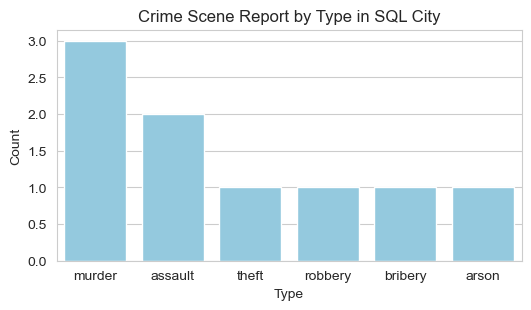

In [86]:
# Set plot style using seaborn via matplotlib
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(6, 3)) # Figure size
sns.barplot(data=objective1, x="type", y="count", color="skyblue") # Sns barplots are "nicer" than matplotlib :) 

# Add labels and title. ALL graphs NEED a title, axis labels, and captions.
plt.title("Crime Scene Report by Type in SQL City")
plt.xlabel("Type")
plt.ylabel("Count")

# Show the plot
plt.show()

<b>Figure 1:</b> Submitted crime scene reports by crime type in SQL City from 2017-2018.
<br><br>
Answer: Police officers should receive more training in identifying murder and assault at crime scenes.

<b>Objective 2: </b>The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime? 

In [62]:
# Select the substr (First 6 characters) from date AS month (YYYYMM), count all records as count from crime_scene_report
# where the city is SQL city, group the result set by month and descending count
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT substr(date, 1, 6) AS month, COUNT(*) as count 
                                FROM crime_scene_report 
                                WHERE city = 'SQL City'
                                GROUP BY month
                                ORDER BY count DESC""")
    objective2 = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

objective2

,month,count
0,201801,4
1,201802,2
2,201711,1
3,201708,1
4,201707,1


Answer: Officers should work DOUBLE overtime during January!

<b>Objective 3:</b> To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?

In [64]:
#This one is a bit of a stretch :)
#Select membership_status and COUNT all records as count from get_fit_now_member table
#GROUP the records BY membership_status and ORDER BY the decending count
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT membership_status, COUNT(*) as count 
                            FROM get_fit_now_member
                            GROUP BY membership_status
                            ORDER BY count DESC""")
    objective3 = pd.read_sql(query, connection) # Use pandas to read the sql query with the connection to the database

objective3

,membership_status,count
0,gold,68
1,silver,63
2,regular,53


Answer: The officers receive a complimentary regular gym membership.

In [25]:
#Disconnect from the database. Always remember to disconnect :) 
connection = engine.connect()
connection.close()
print("Database connection closed.")

Database connection closed.
